Supply chain analytics is a valuable part of data-driven decision-making in various industries such as manufacturing, retail, healthcare, and logistics. It is the process of collecting, analyzing and interpreting data related to the movement of products and services from suppliers to customers.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [3]:
df = pd.read_csv("D:\supply_chain_data.csv")
df.head() 
#Dont need of any feature selection cross check boston

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


since its a supply chain analysis(end to end process of the product.).We think in many aspects but cost efficiency(key metrics) 
is the vital one.Here, the analysis first focus on the revenue generated by particular products.This project relates 
the suppliers,manufactures and retailers.And then focus moved towards stock levels,retailers shipping & its cost,Manufacturing lead time,defect rates,Transportation mode.

In [7]:
df.isna().sum()
#Hence it's a clean data.

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [12]:
df['SKU'].unique()

array(['SKU0', 'SKU1', 'SKU2', 'SKU3', 'SKU4', 'SKU5', 'SKU6', 'SKU7',
       'SKU8', 'SKU9', 'SKU10', 'SKU11', 'SKU12', 'SKU13', 'SKU14',
       'SKU15', 'SKU16', 'SKU17', 'SKU18', 'SKU19', 'SKU20', 'SKU21',
       'SKU22', 'SKU23', 'SKU24', 'SKU25', 'SKU26', 'SKU27', 'SKU28',
       'SKU29', 'SKU30', 'SKU31', 'SKU32', 'SKU33', 'SKU34', 'SKU35',
       'SKU36', 'SKU37', 'SKU38', 'SKU39', 'SKU40', 'SKU41', 'SKU42',
       'SKU43', 'SKU44', 'SKU45', 'SKU46', 'SKU47', 'SKU48', 'SKU49',
       'SKU50', 'SKU51', 'SKU52', 'SKU53', 'SKU54', 'SKU55', 'SKU56',
       'SKU57', 'SKU58', 'SKU59', 'SKU60', 'SKU61', 'SKU62', 'SKU63',
       'SKU64', 'SKU65', 'SKU66', 'SKU67', 'SKU68', 'SKU69', 'SKU70',
       'SKU71', 'SKU72', 'SKU73', 'SKU74', 'SKU75', 'SKU76', 'SKU77',
       'SKU78', 'SKU79', 'SKU80', 'SKU81', 'SKU82', 'SKU83', 'SKU84',
       'SKU85', 'SKU86', 'SKU87', 'SKU88', 'SKU89', 'SKU90', 'SKU91',
       'SKU92', 'SKU93', 'SKU94', 'SKU95', 'SKU96', 'SKU97', 'SKU98',
       'SKU99'], dtyp

<BarContainer object of 100 artists>

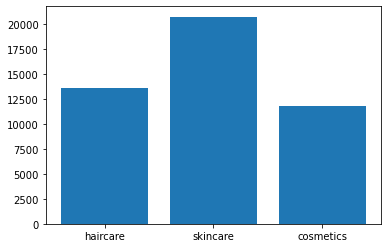

In [65]:
plt.bar(height=df.groupby('Product type')['Number of products sold'].transform('sum'),x=df['Product type'])
#sales data based on product

<AxesSubplot:xlabel='Revenue generated', ylabel='Product type'>

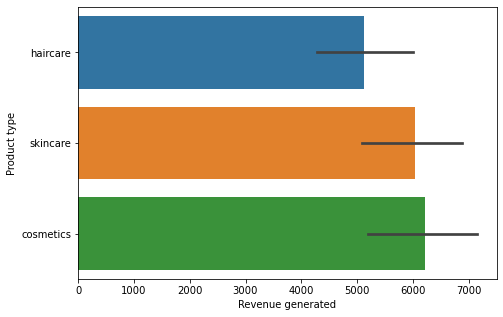

In [58]:
plt.figure(figsize=(7.5,5))
sns.barplot(x=df['Revenue generated'],y=df['Product type'])
# Revenues of each product

In [25]:
df.groupby('Product type')['Revenue generated'].sum()

Product type
cosmetics    161521.265999
haircare     174455.390605
skincare     241628.162133
Name: Revenue generated, dtype: float64

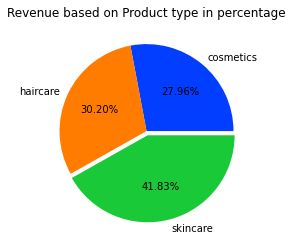

In [139]:
palette_color = sns.color_palette('bright')
explode = [0,0,0.05]
keys=['cosmetics','haircare','skincare']
plt.title('Revenue based on Product type in percentage')
plt.pie(x=df.groupby('Product type')['Revenue generated'].sum(),explode=explode,colors=palette_color,labels=keys,autopct='%.2f%%')
plt.show()

In [28]:
df['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

In [75]:
df.groupby('Customer demographics')['Number of products sold'].sum()

Customer demographics
Female        12801
Male           7507
Non-binary    10580
Unknown       15211
Name: Number of products sold, dtype: int64

<BarContainer object of 100 artists>

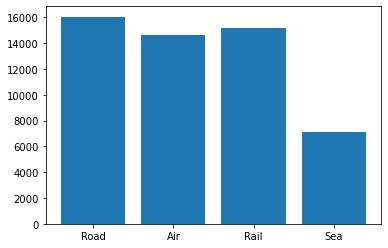

In [5]:
plt.bar(height=df.groupby('Transportation modes')['Costs'].transform('sum'),x=df['Transportation modes'])

#cost of road transportation is higher.

<AxesSubplot:xlabel='Transportation modes', ylabel='count'>

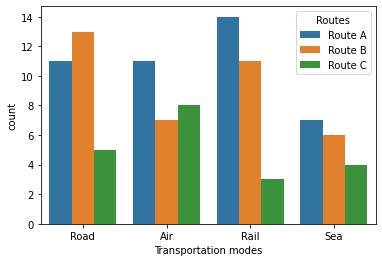

In [85]:
sns.countplot(x=df['Transportation modes'],hue=df['Routes'],hue_order=['Route A','Route B','Route C'])

#Based on the various routes we are analysing the which transportation mode is the suitable one.

<AxesSubplot:xlabel='Price', ylabel='Density'>

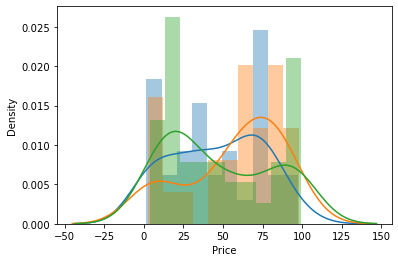

In [7]:
sns.distplot(a = df['Price'][df['Product type']=='haircare'],bins=10,)
sns.distplot(a = df['Price'][df['Product type']=='cosmetics'],bins=10)
sns.distplot(a = df['Price'][df['Product type']=='skincare'],bins=10)

#Distribution of price for each product are analysed.And its showing as the Multimodal distribution.

In [93]:
df.groupby('Product type')['Price']

Product type
cosmetics    57.361058
haircare     46.014279
skincare     47.259329
Name: Price, dtype: float64

<AxesSubplot:xlabel='Lead times'>

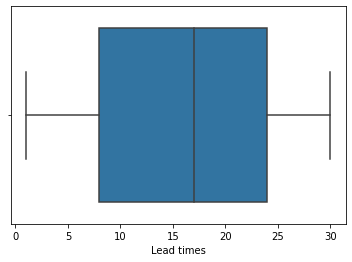

In [115]:
sns.boxplot(x=df['Lead times'])

No outliers are present.

In [116]:
df.head(1)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.22641,Road,Route B,187.752075


<AxesSubplot:xlabel='Defect rates', ylabel='Lead time'>

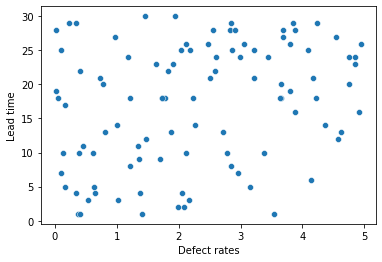

In [151]:
sns.scatterplot(x=df['Defect rates'],y=df['Lead time'])

Increasing lead time there is a less possibility for defect rates.

<AxesSubplot:xlabel='Production volumes', ylabel='Manufacturing costs'>

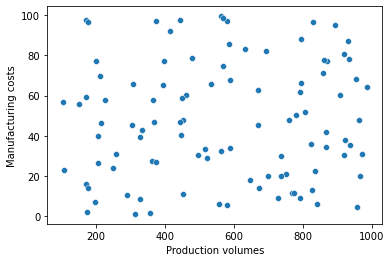

In [150]:
sns.scatterplot(x=df['Production volumes'],y=df['Manufacturing costs'])

Higher the production volume lesser will be the manufacturing cost.

<BarContainer object of 100 artists>

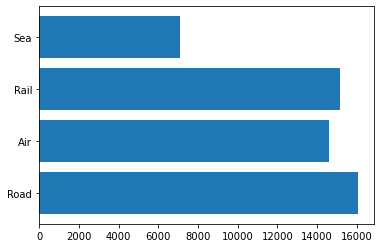

In [142]:
plt.barh(y=df['Transportation modes'],width=df.groupby('Transportation modes')['Costs'].transform('sum'))

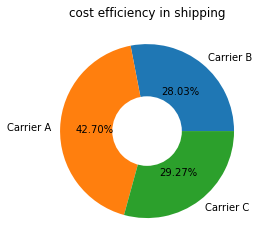

In [11]:
keys = df['Shipping carriers'].unique()
plt.pie(x=df.groupby('Shipping carriers')['Shipping costs'].sum(),labels=keys,autopct='%.2f%%',)
#circle
adding_circle = plt.Circle((0,0),0.40,fc='white')
#getting the current figure
fig = plt.gcf()
#inserting 
fig.gca().add_artist(adding_circle)
plt.title('cost efficiency in shipping')
plt.show()

In [120]:
cc = df[['Price','Number of products sold','Revenue generated']]
cc.corr(method='pearson')

,Price,Number of products sold,Revenue generated
Price,1.000000,0.005739,0.038424
Number of products sold,0.005739,1.000000,-0.001641
Revenue generated,0.038424,-0.001641,1.000000


<AxesSubplot:>

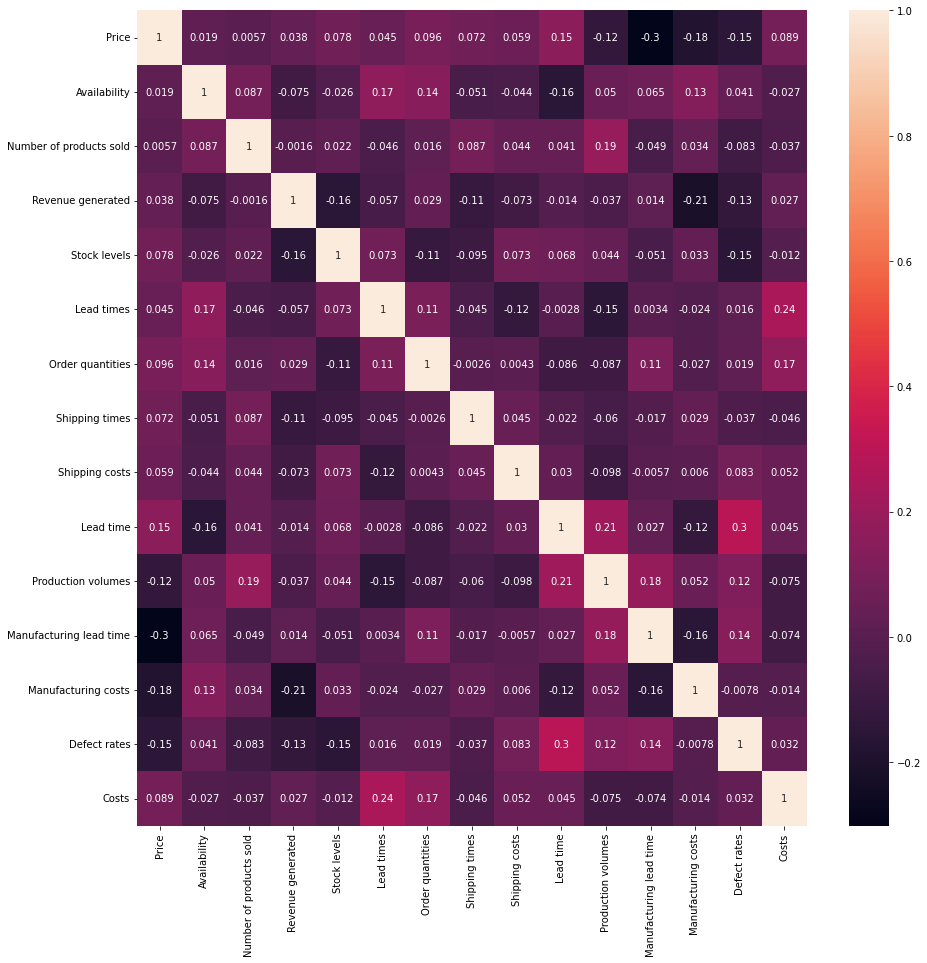

In [124]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(),annot=True)

In [8]:
import plotly.express as px
defect_rate_by_product = df.groupby('Product type')['Defect rates'].mean().reset_index()
fig = px.bar(defect_rate_by_product, x='Product type', y='Defect rates',
             title='Average defect rates by product type')
fig.show()

So the defect rate of haircare products is higher. Now let’s have a look at the defect rates by mode of transportation

In [10]:
pivot_table = pd.pivot_table(df, values='Defect rates',
                           index=['Transportation modes'],
                           aggfunc='mean')

transportation_chart = px.pie(values=pivot_table['Defect rates'],
                             names=pivot_table.index,
                             title='Defect Rates by Transportation Mode',
                             hole=0.5,
                             color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

Road transportation results in a higher defect rate, and Air transportation has the lowest defect rate.

# Conclusion

Here comes the analysis end.This Analysis shows that Road transportation has the higher defect rates and higher cost of transportation.
And based on revenue skin care products generated more revenue.Manufacturing lead time and Manufacturing cost are more or less 
the acceptable one.